# Exploring the recorded test data

5 strategies x 8 load sizes x 10 repetitions ~= 230k calls

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme(style="darkgrid")

In [2]:
sizes = [20, 50, 100, 200, 500, 750, 1000, 2000]
identifiers = ['E', 'S', 'R', 'M']
e_dfs = []
s_dfs = []
m_dfs = []
r_dfs = []

In [3]:
for strategy in range(5):
    for size in sizes:
        for i in identifiers:
            path = "output/strategy_%d/test-%d-%s.csv" % (strategy, size, i)
            df = pd.read_csv(path, header=None)
            if i == 'S':
                s_dfs.append((strategy, size, df))
            elif i == 'E':
                e_dfs.append((strategy, size, df))
            elif i == 'M':
                m_dfs.append((strategy, size, df))
            elif i == 'R':
                r_dfs.append((strategy, size, df))


## Exploring the S dataframes (req. success)

In [4]:
all_good = True
for t in s_dfs:
    counts = t[2][1].value_counts()
    if counts.item() != 10:
        all_good = False
        print("Failed requests for strategy %d at size %d" % (t[0], t[1]))
        print(t[2].head(10))

if all_good:
    print("All requests went through")

All requests went through


## Exploring the E dataframes (strategy execution times)

In [5]:
e_df = pd.concat([df[2] for df in e_dfs])
e_df = e_df.drop([0], axis=1)
e_df.columns = ['name', 'no_req', 'time', 'req_per_s']
e_df.head()


name  no_req     time  req_per_s
0  strategy_0      20  0.87984   22.73135
1  strategy_0      20  0.73134   27.34723
2  strategy_0      20  0.82891   24.12799
3  strategy_0      20  0.77400   25.83984
4  strategy_0      20  0.76576   26.11793

In [6]:
e_df.dtypes

name          object
no_req         int64
time         float64
req_per_s    float64
dtype: object

Text(0.5, 1.0, 'Throughput per strategy')

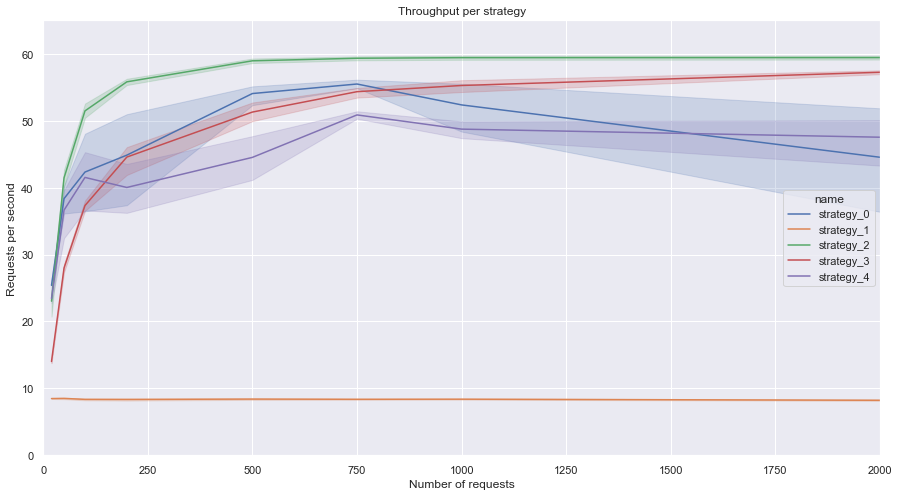

In [7]:
fig = plt.gcf()
fig.set_size_inches(15, 8)
sns.lineplot(x='no_req', y='req_per_s', hue='name', data=e_df, markers=True)
plt.xlim(0, 2000)
plt.ylim(0, 65)

plt.xlabel("Number of requests")
plt.ylabel("Requests per second")
plt.title("Throughput per strategy")

In [8]:
# Alternative manual plot

# e_df = e_df.groupby(['name', 'no_req']).mean().reset_index().pivot(index='no_req', columns='name')['req_per_s'].reset_index()
# e_df = e_df.set_index('no_req')
# e_df.head(20)
# fig, ax = plt.subplots(1,1)
# fig.set_size_inches(10, 5)
# e_df.plot(ax=ax)

## Exploring the R dataframes (response time stats)

In [9]:
for t in r_dfs:
    t[2]['name'] = f"strategy_{t[0]}"
    t[2]['no_req'] = t[1]
r_df = pd.concat([df[2] for df in r_dfs])
r_df = r_df.drop([0], axis=1)
r_df.columns = ['min', 'avg', 'max', 'std', 'name', 'no_req']
r_df.head()

min     avg    max        std        name  no_req
0  514.0  702.55  848.0   89.55472  strategy_0      20
1  356.0  552.05  694.0   99.22725  strategy_0      20
2  432.0  611.90  807.0  108.54764  strategy_0      20
3  397.0  591.40  745.0  102.45506  strategy_0      20
4  370.0  585.20  738.0   96.05342  strategy_0      20

Text(0.5, 1.0, 'Response time per strategy')

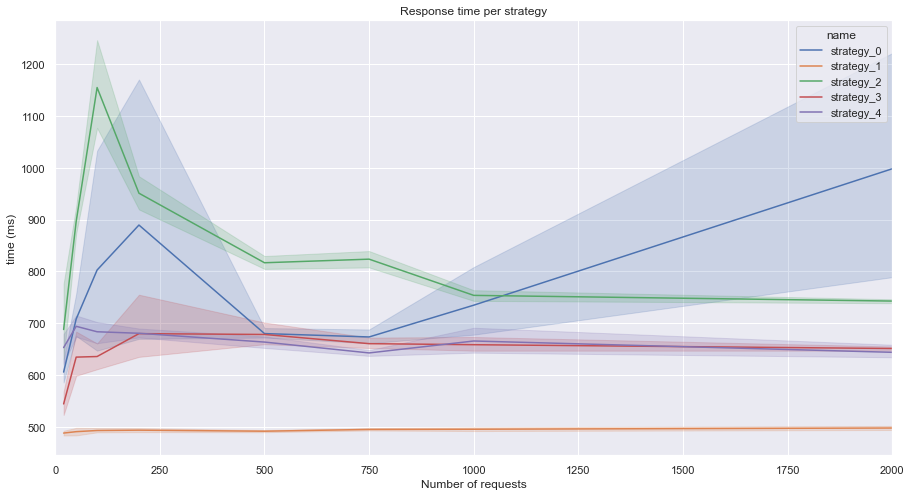

In [10]:
fig = plt.gcf()
fig.set_size_inches(15, 8)
sns.lineplot(x='no_req', y='avg', hue='name', data=r_df)
plt.xlim(0, 2000)

plt.xlabel("Number of requests")
plt.ylabel("time (ms)")
plt.title("Response time per strategy")

<Figure size 1080x576 with 0 Axes>

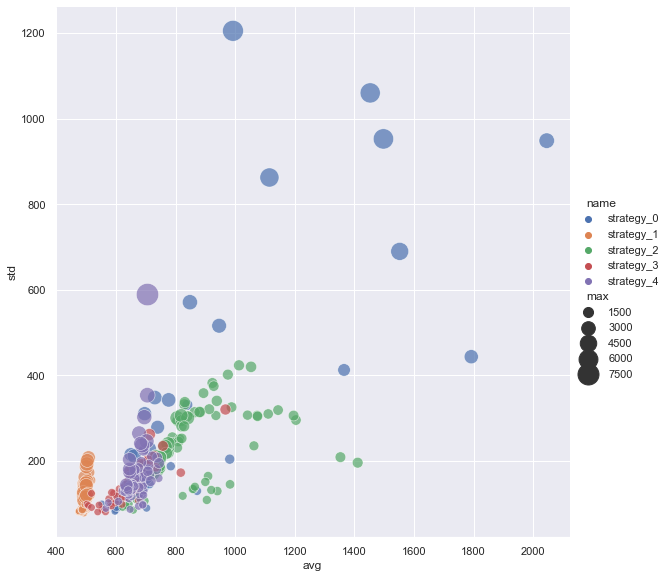

In [11]:
fig = plt.gcf()
fig.set_size_inches(15, 8)
sns.relplot(x='avg', y='std', data=r_df, hue='name', size="max", sizes=(50, 500), alpha=.7, height=8)

<Figure size 1080x576 with 0 Axes>

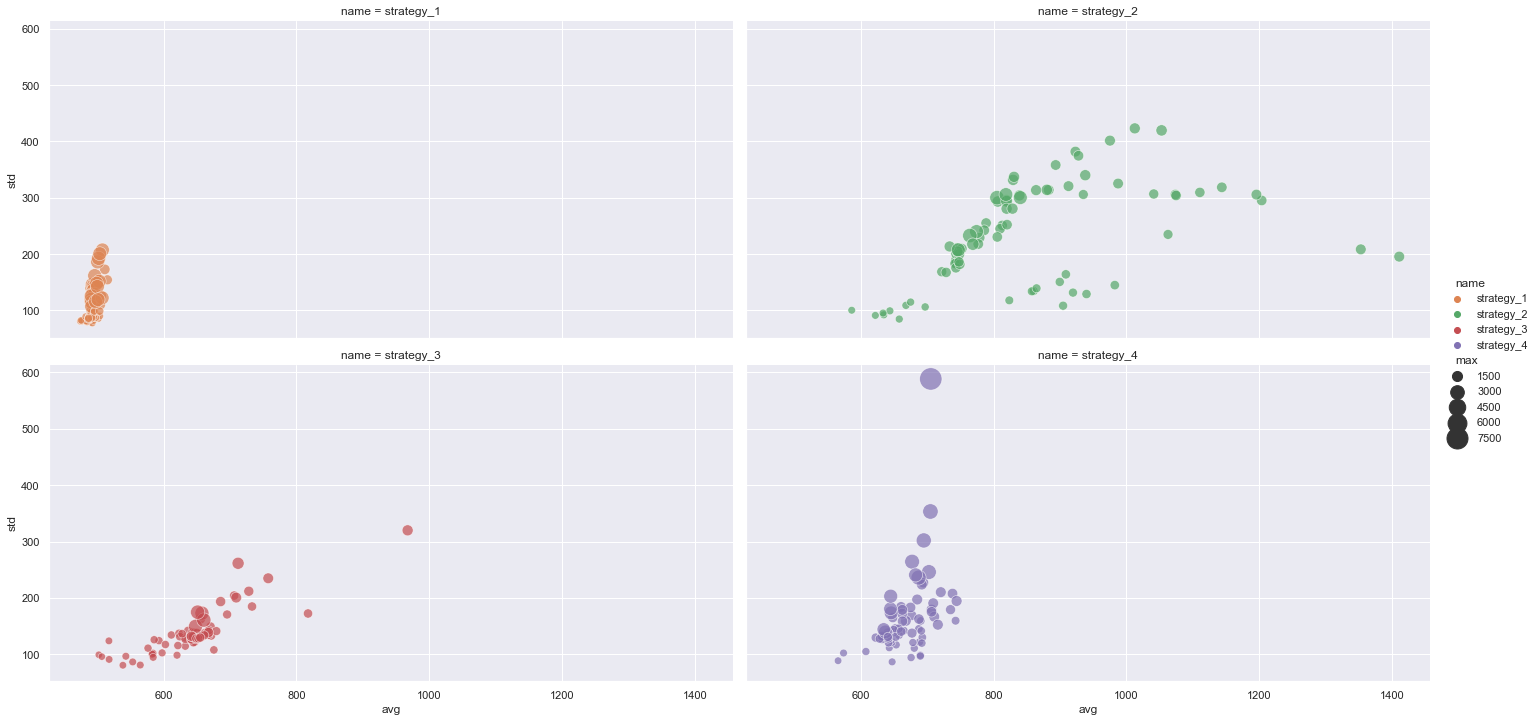

In [12]:
fig = plt.gcf()
fig.set_size_inches(15, 8)
sns.relplot(x='avg', y='std', data=r_df[r_df['name'] != 'strategy_0'], col='name', col_wrap=2, size="max", hue='name', palette=np.array(sns.color_palette()[1:]), sizes=(50, 500), alpha=.7, height=5, aspect=2)

## Exploring the M dataframes (per machine average response time)

In [13]:
for t in m_dfs:
    t[2]['name'] = f"strategy_{t[0]}"
    t[2]['no_req'] = t[1]
m_df = pd.concat([df[2] for df in m_dfs])
m_df = m_df.drop([0], axis=1)
m_df.columns = ['us/0', 'asia/1', 'asia/0', 'us/1', 'emea/0', 'name', 'no_req']
m_df.head()

us/0  asia/1  asia/0    us/1  emea/0        name  no_req
0  682.50  777.50  778.25  691.00  583.50  strategy_0      20
1  536.75  654.25  632.00  534.75  402.50  strategy_0      20
2  603.75  738.50  646.50  621.25  449.50  strategy_0      20
3  560.25  711.00  677.50  550.50  457.75  strategy_0      20
4  555.25  683.50  675.50  563.25  448.50  strategy_0      20

Text(0.5, 1.0, 'Response time per strategy')

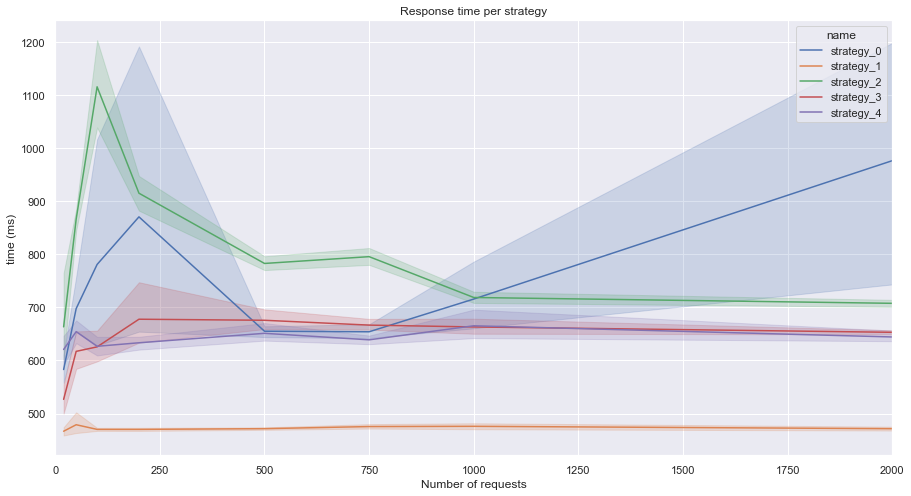

In [14]:
fig = plt.gcf()
fig.set_size_inches(15, 8)
sns.lineplot(x='no_req', y='us/0', hue='name', data=m_df)
plt.xlim(0, 2000)

plt.xlabel("Number of requests")
plt.ylabel("time (ms)")
plt.title("Response time per strategy")

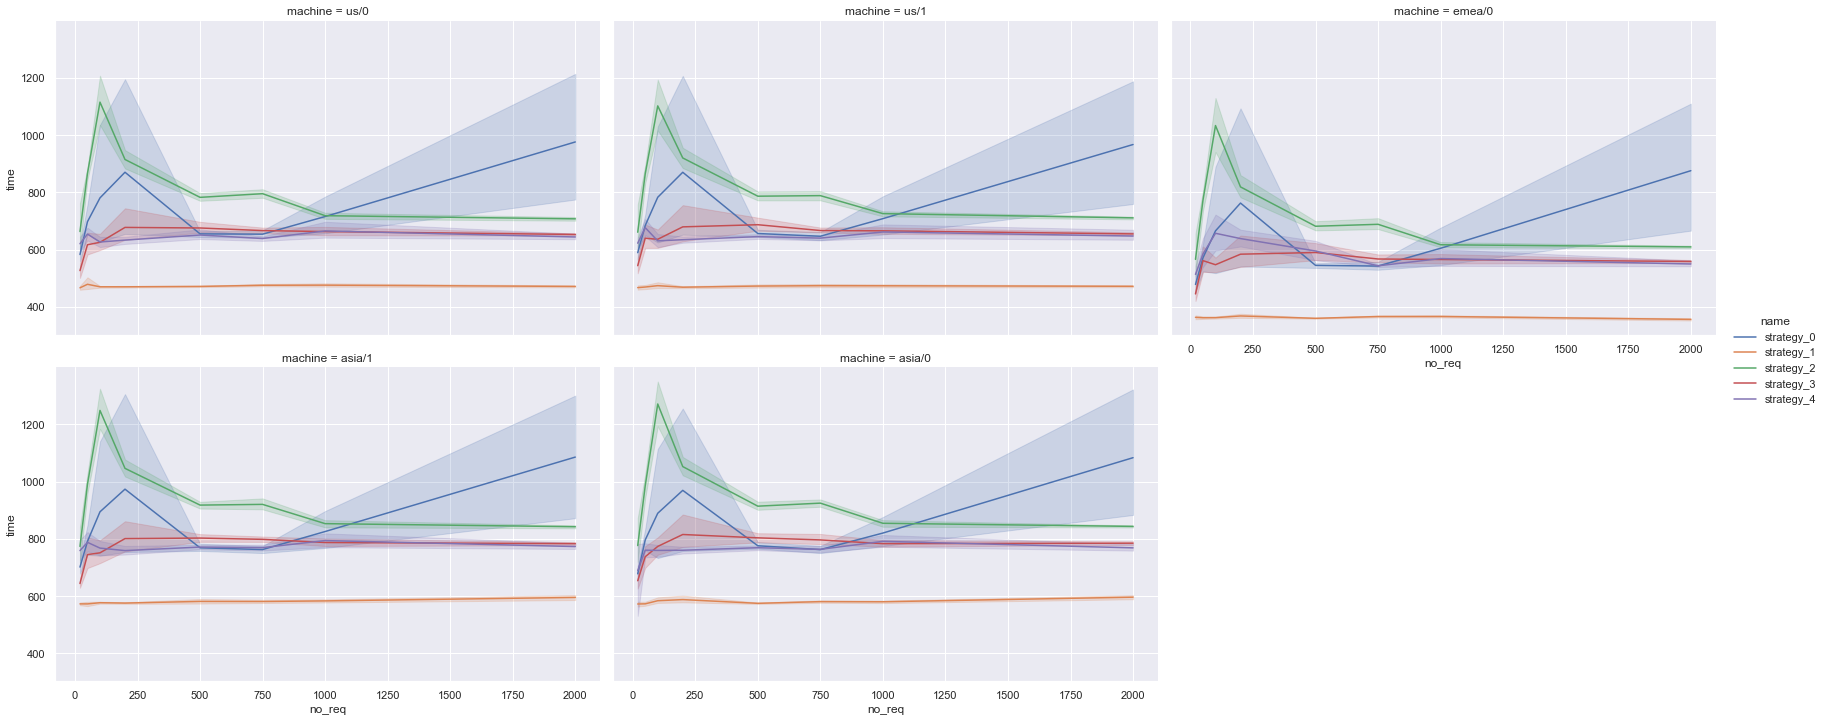

In [15]:
m_df2 = pd.melt(m_df, id_vars=['name', 'no_req'], value_vars=['us/0', 'asia/1', 'asia/0', 'us/1', 'emea/0'], var_name='machine', value_name='time')
sns.relplot(x='no_req', y='time', data=m_df2, col='machine', col_order=['us/0', 'us/1', 'emea/0', 'asia/1', 'asia/0'], hue='name', kind='line', height=5, aspect=1.6, col_wrap=3)

In [16]:
m_df2 = m_df2.groupby(['machine', 'name']).mean().reset_index().drop(['no_req'], axis=1)
m_df2.head()

machine        name        time
0  asia/0  strategy_0  847.197750
1  asia/0  strategy_1  581.348010
2  asia/0  strategy_2  953.161771
3  asia/0  strategy_3  768.764955
4  asia/0  strategy_4  758.014812

In [17]:
m_df2 = m_df2.pivot(index='name', columns='machine')['time'].reset_index()
m_df2.head()

machine        name      asia/0      asia/1      emea/0        us/0  \
0        strategy_0  847.197750  850.701521  630.848823  741.657792   
1        strategy_1  581.348010  580.146750  363.209292  472.573271   
2        strategy_2  953.161771  949.462448  723.644208  820.604510   
3        strategy_3  768.764955  764.325148  552.500497  638.223577   
4        strategy_4  758.014812  772.924847  581.478469  641.838153   

machine        us/1  
0        738.252583  
1        471.521219  
2        820.126333  
3        646.820266  
4        644.988560